In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gseapy as gp

In [2]:
degs = pd.read_csv("/mnt/c/Users/ouyangkang/Downloads/Malignant_marker_genes.csv")

In [4]:
degs.head(5)

,0,1,2,3,4,5,6,7,8,9
0,MT-RNR2,MT-RNR2,DOCK4,FCHSD2,DOCK4,SLC8A1,HDAC9,RBFOX1,CERS6,RBFOX1
1,MT-RNR1,RNA5SP54,FNDC3B,TCF4,ZEB2,REL,WDFY4,CNTNAP2,SLCO5A1,KCTD8
2,RNA5SP54,MT-RNR1,ACSL1,RABGAP1L,IL1B,NFKB1,CCSER1,LINC01588,KIF2A,MAST4
3,SDK1,SNHG5,DMXL2,COBLL1,ACSL1,JARID2,AUTS2,ASTN2,GRK3,PRG4
4,VCAN,CD86,RBM47,LINC01478,CD44,SIPA1L1,C1orf21,TRPM3,ENOX1,ZFPM2


In [5]:
focus_genes = degs["9"][:100]
focus_genes

0     RBFOX1
1      KCTD8
2      MAST4
3       PRG4
4      ZFPM2
       ...  
95     TENM3
96     GOLM1
97       DST
98      DAB2
99     SPARC
Name: 9, Length: 100, dtype: object

In [6]:
enr_up = gp.enrichr(focus_genes,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

In [7]:
# trim (go:...)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


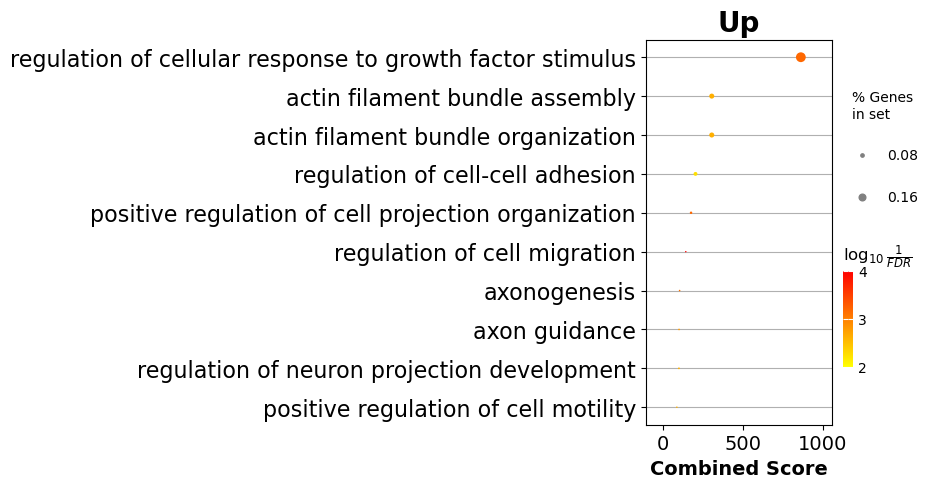

In [8]:
# dotplot
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r)
plt.show()

In [12]:
enr_up.res2d[enr_up.res2d["P-value"] < 0.05].to_csv("/mnt/c/Users/ouyangkang/Desktop/result_malignant.csv")

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


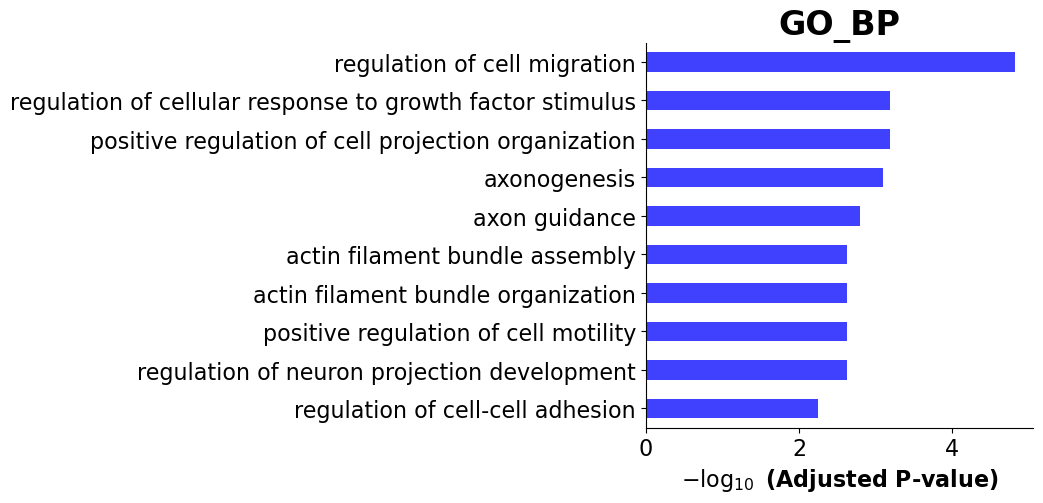

In [9]:
ax = gp.barplot(enr_up.res2d, figsize=(5,5),
                # group ='DW',
                title ="GO_BP",
                color = "blue")